In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df=pd.read_csv(r'/content/kaggle_parsed_dataset.csv')

In [6]:
df.head()

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [7]:
df.isnull().sum()

index          0
oh_label       0
Date        1242
Text           0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.describe()

,index,oh_label
count,7557.000000,7557.000000
mean,4417.798068,0.350536
std,2478.329364,0.477169
min,0.000000,0.000000
25%,2308.000000,0.000000
50%,4496.000000,0.000000
75%,6432.000000,1.000000
max,8798.000000,1.000000


In [10]:
df.shape

(7557, 4)

In [11]:
!pip install keras

In [12]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import word2vec

from collections import Counter
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline
from nltk.stem.porter import PorterStemmer
import string
from wordcloud import WordCloud

from textblob import TextBlob

import keras
import tensorflow as tf
from keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import word2vec

In [16]:
pip install contractions

In [17]:
import contractions

In [18]:
only_english = set(nltk.corpus.words.words())
def clean_text(text):

    sample = text
    sample = " ".join([x.lower() for x in sample.split()])
    sample = re.sub(r"\S*https?:\S*", '', sample) #links and urls
    sample = re.sub('\[.*?\]', '', sample) #text between [square brackets]
    sample = re.sub('\(.*?\)', '', sample) #text between (parenthesis)
    sample = re.sub('#', ' ', sample) #remove hashtags
    sample = ' '.join([x for x in sample.split() if not x.startswith('@')]) # remove mentions with @
    sample = " ".join([contractions.fix(x) for x in sample.split()])  # fixes contractions like you're to you are
    sample = re.sub('[%s]' % re.escape(string.punctuation), ' ', sample) #punctuations
    sample = re.sub('\w*\d\w', '', sample) #digits with trailing or preceeding text
    sample = re.sub(r'\n', ' ', sample) #new line character
    sample = re.sub(r'\\n', ' ', sample) #new line character
    sample = re.sub("[''""...“”‘’…]", '', sample) #list of quotation marks
    sample = " ".join(x.strip() for x in sample.split()) #strips whitespace
    sample = re.sub(r', /<[^>]+>/', '', sample)    #HTML attributes

    sample = ' '.join(list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, sample.split()))) #languages other than english

    sample = sample.strip()
    sample = " ".join([x.strip() for x in sample.split()])

    return sample

In [19]:
df['cleaned_text'] = df['Text'].apply(lambda x: clean_text(str(x)))
df


,index,oh_label,Date,Text,cleaned_text
0,0,1,20120618192155Z,"""You fuck your dad.""",you fuck your dad
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ...",i really do not understand your point xa0 it s...
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...",c b xu g ddng bi t xecnh c xf3 ho xe0 kh g nc ...
5,5,0,20120620171226Z,"""@SDL OK, but I would hope they'd sign him to ...",sdl ok but i would hope they would sign him to...
6,6,0,20120503012628Z,"""Yeah and where are you now?""",yeah and where are you now
...,...,...,...,...,...
8794,8794,0,20120612003508Z,"""Never really gave it much thought. I just fig...",never really gave it much thought i just figur...
8795,8795,0,20120619210456Z,"""Nadie se salva de la regla 34 xd""",nadie se salva de la regla xd
8796,8796,0,20120528234613Z,"""Question: Are you a boy or a girl?""",question are you a boy or a girl
8797,8797,1,20120619153537Z,"""Leave your email or phone number and maybe yo...",leave your email or phone number and maybe you...


In [20]:
cleaned_text=df['cleaned_text']

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(cleaned_text).toarray()
y=df['oh_label']

In [22]:
print(X)
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0       1
1       0
4       0
5       0
6       0
       ..
8794    0
8795    0
8796    0
8797    1
8798    0
Name: oh_label, Length: 7557, dtype: int64


In [23]:
len(X[0])

1500

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
GN_model=classifier.fit(X_train, y_train)

In [26]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[292 685]
 [ 94 441]]


0.48478835978835977

In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
SC_model=classifier.fit(X_train, y_train)

In [28]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[955  22]
 [463  72]]


0.6792328042328042

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model=KNN.fit(X_train, y_train)

In [31]:
y_pred = KNN.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [32]:
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[852 125]
 [303 232]]


0.716931216931217

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_model=classifier.fit(X_train, y_train)

In [34]:
y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[783 194]
 [206 329]]


0.7354497354497355

[Text(0.7674702772527255, 0.9974874371859297, 'x[1493] <= 0.5\nentropy = 0.934\nsamples = 6045\nvalue = [3931, 2114]'),
 Text(0.581006414892278, 0.992462311557789, 'x[1495] <= 0.5\nentropy = 0.693\nsamples = 2333\nvalue = [1899, 434]'),
 Text(0.5426994600567889, 0.9874371859296482, 'x[124] <= 0.5\nentropy = 0.552\nsamples = 1916\nvalue = [1671, 245]'),
 Text(0.5194697420603175, 0.9824120603015075, 'x[600] <= 0.5\nentropy = 0.52\nsamples = 1875\nvalue = [1656, 219]'),
 Text(0.4904864608866503, 0.9773869346733668, 'x[1278] <= 0.5\nentropy = 0.494\nsamples = 1844\nvalue = [1645, 199]'),
 Text(0.46876926654336076, 0.9723618090452262, 'x[411] <= 0.5\nentropy = 0.587\nsamples = 1062\nvalue = [912, 150]'),
 Text(0.4589901291298402, 0.9673366834170855, 'x[809] <= 0.5\nentropy = 0.571\nsamples = 1052\nvalue = [910, 142]'),
 Text(0.4503544510648465, 0.9623115577889447, 'x[1238] <= 0.5\nentropy = 0.556\nsamples = 1044\nvalue = [909, 135]'),
 Text(0.43963665299208754, 0.957286432160804, 'x[1497] <

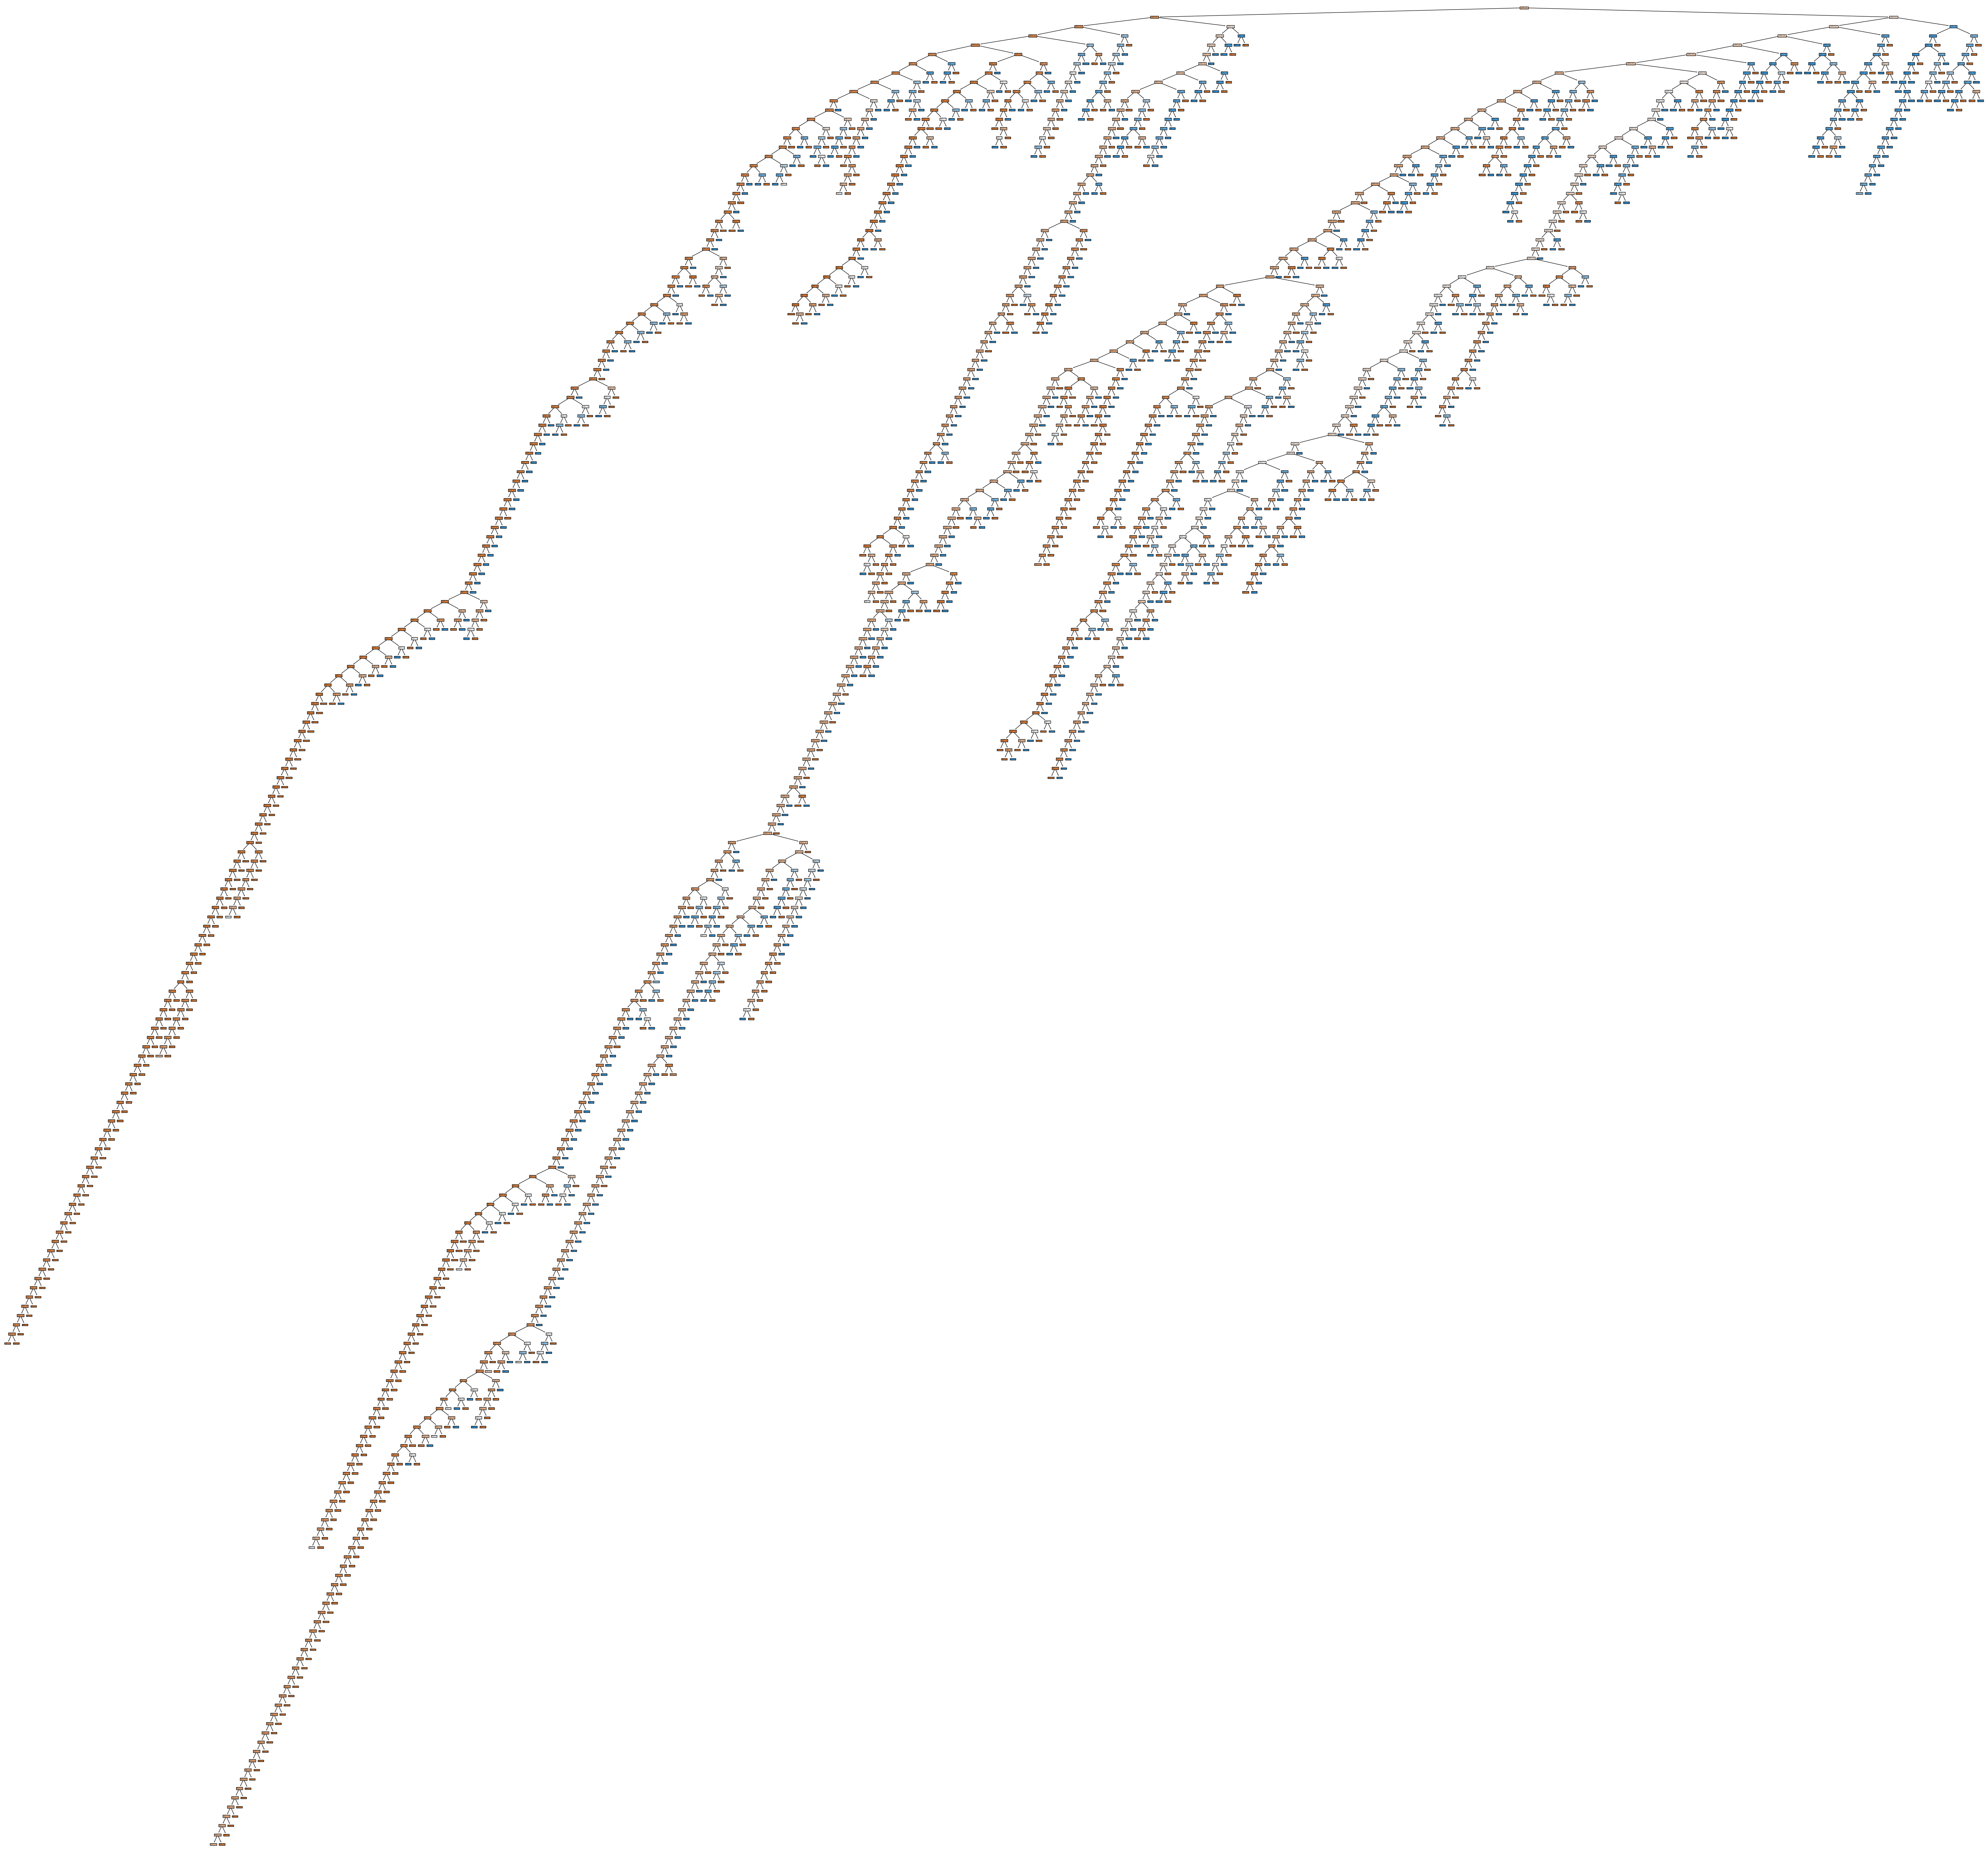

In [35]:
from sklearn import tree
plt.figure(figsize=(80,75))
tree.plot_tree(classifier, filled=True)

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_model=classifier.fit(X_train, y_train)

In [37]:
y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[887  90]
 [242 293]]


0.7804232804232805

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
log_model=classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[871 106]
 [186 349]]


0.8068783068783069

<ipython-input-41-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


              precision    recall  f1-score   support

           0       0.74      0.87      0.80       977
           1       0.65      0.43      0.52       535

    accuracy                           0.72      1512
   macro avg       0.69      0.65      0.66      1512
weighted avg       0.71      0.72      0.70      1512



<ipython-input-41-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


              precision    recall  f1-score   support

           0       0.79      0.91      0.84       977
           1       0.77      0.55      0.64       535

    accuracy                           0.78      1512
   macro avg       0.78      0.73      0.74      1512
weighted avg       0.78      0.78      0.77      1512



<ipython-input-41-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


              precision    recall  f1-score   support

           0       0.76      0.30      0.43       977
           1       0.39      0.82      0.53       535

    accuracy                           0.48      1512
   macro avg       0.57      0.56      0.48      1512
weighted avg       0.63      0.48      0.46      1512



<ipython-input-41-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


              precision    recall  f1-score   support

           0       0.79      0.80      0.80       977
           1       0.63      0.61      0.62       535

    accuracy                           0.74      1512
   macro avg       0.71      0.71      0.71      1512
weighted avg       0.73      0.74      0.73      1512



<ipython-input-41-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


              precision    recall  f1-score   support

           0       0.67      0.98      0.80       977
           1       0.77      0.13      0.23       535

    accuracy                           0.68      1512
   macro avg       0.72      0.56      0.51      1512
weighted avg       0.71      0.68      0.60      1512



<ipython-input-41-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
<ipython-input-41-ff13a287dbe0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x= 'Accuracy', y = 'Models', data=results, palette="colorblind")


              precision    recall  f1-score   support

           0       0.82      0.89      0.86       977
           1       0.77      0.65      0.71       535

    accuracy                           0.81      1512
   macro avg       0.80      0.77      0.78      1512
weighted avg       0.80      0.81      0.80      1512

                   Models   Accuracy
0    KNeighborsClassifier  68.783548
0  RandomForestClassifier  73.410596
0              GaussianNB  53.902928
0  DecisionTreeClassifier  68.851081
0                     SVC  74.207041
0      LogisticRegression  78.637156


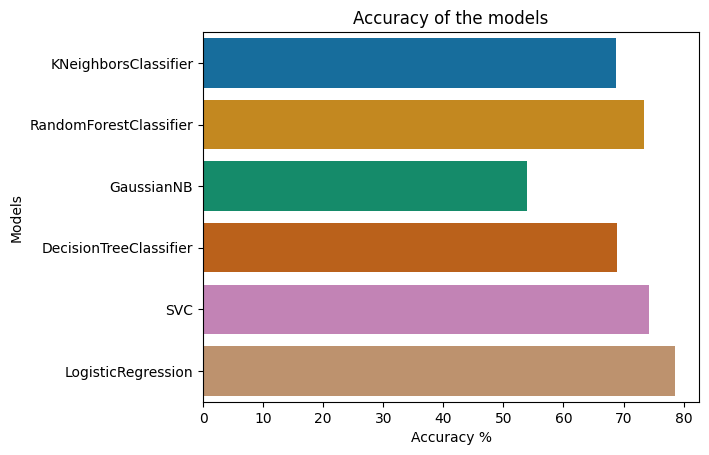

In [41]:
import seaborn as sea
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
models = [KNN_model,rf_model,GN_model,DT_model,SC_model,log_model]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = cross_val_score(model,X_test,y_test,cv=10,scoring="accuracy").mean()
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    print(classification_report(y_test, y_pred))

sea.barplot(x= 'Accuracy', y = 'Models', data=results, palette="colorblind")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models')
print(results)